***Name : Sawant Shreyas Hanmant***

***Roll No.: 2447046***

***Batch : C***

**Praablem Statement ->**

***Feature Transformation A. To use PCA Algorithm for dimensionality reduction.
You have a dataset that includes measurements for different variables on wine
(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data
so that most variations in the measurements of the variables are captured by a small
number of principal components so that it is easier to distinguish between red and
white wine by inspecting these principal components.***

In [1]:
import pandas as pd
import numpy as np

C:\Users\SHREYAS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
wine = pd.read_csv("Wine.csv")

In [3]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [5]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [35]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [8]:
wine.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [12]:
x = wine.drop("Customer_Segment", axis=1)
y = wine.Customer_Segment

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scale = StandardScaler()

In [16]:
x_scale = scale.fit_transform(x)

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)

In [19]:
x_pca = pca.fit_transform(x_scale)

In [21]:
pca_wine = pd.DataFrame(data=x_pca, columns=['PCA_1', 'PCA_2'])
pca_wine.head()

,PCA_1,PCA_2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [24]:
final_wine = pd.concat([pca_wine, y], axis=1)
final_wine.head()

,PCA_1,PCA_2,Customer_Segment
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


In [25]:
eigenvalues = pca.explained_variance_

In [29]:
print("Eigenvalues (Variance explained by each PC):", eigenvalues)

Eigenvalues (Variance explained by each PC): [4.73243698 2.51108093]


In [27]:
eigenvectors = pca.components_

In [32]:
print("\nEigenvectors (Principal Components):\n\n", eigenvectors)


Eigenvectors (Principal Components):

 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

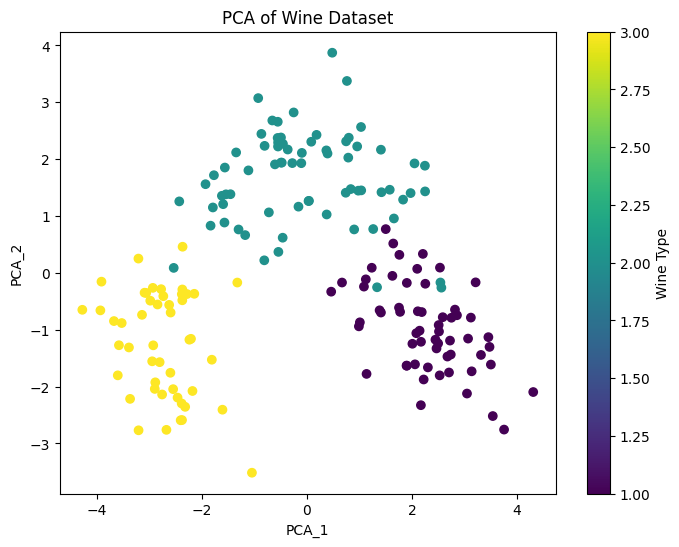

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(final_wine['PCA_1'], final_wine['PCA_2'], c=final_wine["Customer_Segment"], cmap='viridis')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Type')
plt.show()